### Installing of Requirements (only run this if you haven't installed the necessary libraries found in requirements.txt)

In [1]:
# !pip install -r requirements.txt

In [80]:
import geopandas as  gpd
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Todo
- convert all geojson files into 1 geodataframe 
- data cleaning
- clip the inputs onto the map layer, similar to getting the intersection between the points and the map layer
- return the output onto a file
- write documentation in this notebook if necessary

### Reading the Paranaque Images and Saving a compiled GEOJSON file of the images 

In [3]:
# Accessing the data of Paranque images
# paranaque_json_dir = 'data/mapillary/paranaque'

# os.chdir(paranaque_json_dir)

In [4]:
# gdf_list = []
# geojson_Count = 0

In [5]:
# for file in os.listdir(paranaque_json_dir):
#     if file.endswith('.geojson'):
#         gdf = gpd.read_file(file)
#         geojson_Count += 1
        
#         # filter out null json files
#         if '"features": []' not in gdf:
#             gdf = gpd.read_file(file)
#             gdf_list.append(gdf)
            

In [6]:
# Run this if you want to view the compiled json

# gdf_list

### Saving the compiled images into a GeoDataFrame in a GEOJSON file

In [7]:
# output_dir = 'output_geojson'
# os.makedirs(output_dir, exist_ok=True)

# merged_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True), crs=gdf_list[0].crs)
# output_filename = 'output_geojson/merged_paranaque.geojson'
# merged_gdf.to_file(output_filename, driver='GeoJSON')
# print(f"Saved {output_filename}")

#the file is found in a folder that can be viewed in the data/paranaque folder as "output_geojson"

In [8]:
# %pip install imagehash

In [9]:
# import os
# import pandas as pd
# import geopandas as gpd
# from PIL import Image
# import imagehash

# def hash_image(file_path):
#     """
#     Compute a hash for an image file.
#     """
#     with Image.open(file_path) as img:
#         return imagehash.average_hash(img)

# def filter_similar_images(gdf_list):
#     """
#     Filter out similar images based on their hash.
#     """
#     filtered_gdf_list = []
#     hash_set = set()

#     for gdf in gdf_list:
#         file_path = gdf['thumb_2048_url']  # Replace 'your_image_column' with the column containing image file paths
#         file_hash = hash_image(file_path)

#         if file_hash not in hash_set:
#             hash_set.add(file_hash)
#             filtered_gdf_list.append(gdf)

#     return filtered_gdf_list

In [10]:
# %pip install tensorflow

## Code for setting up model

## Code for checking similarity score of images

In [11]:
# os.getcwd()

In [12]:
# os.chdir('..')

# MODEL TESTING

In [13]:
img_df = pd.read_csv("train.csv")
img_df

,img1,img2,label
0,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
1,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
2,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
3,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
4,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
...,...,...,...
232,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,1
233,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,1
234,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,1
235,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,1


In [14]:
# filtered_gdf_list = filter_similar_images(gdf_list)

# output_dir = 'output_geojson'
# os.makedirs(output_dir, exist_ok=True)

# merged_gdf = gpd.GeoDataFrame(pd.concat(filtered_gdf_list, ignore_index=True), crs=filtered_gdf_list[0].crs)
# output_filename = 'output_geojson/merged_paranaque.geojson'
# merged_gdf.to_file(output_filename, driver='GeoJSON')
# print(f"Saved {output_filename}")


# NEW MODEL ATTEMPT

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

# Function to create the base convolutional neural network (CNN) for image embedding
def create_base_network(input_shape):
    input_layer = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input_layer)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    model = Model(inputs=input_layer, outputs=x)
    return model

# Function to calculate the Euclidean distance between two image embeddings
def euclidean_distance(vectors):
    vector1, vector2 = vectors
    sum_squared = K.sum(K.square(vector1 - vector2), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_squared, K.epsilon()))

# Function to create the Siamese network
def create_siamese_network(input_shape):
    input_image1 = Input(shape=input_shape)
    input_image2 = Input(shape=input_shape)

    base_network = create_base_network(input_shape)

    # Getting the encoded representation of the input images
    encoded_image1 = base_network(input_image1)
    encoded_image2 = base_network(input_image2)

    # Calculating the distance between the encoded representations
    distance = Lambda(euclidean_distance)([encoded_image1, encoded_image2])

    # Creating the Siamese model
    siamese_model = Model(inputs=[input_image1, input_image2], outputs=distance)

    return siamese_model




c:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
img_df = pd.read_csv("train.csv")
img_df

,img1,img2,label
0,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
1,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
2,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
3,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
4,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl30-2.fna.fbcdn.net/m1/v/t...,1
...,...,...,...
232,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,1
233,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,1
234,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,1
235,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t...,1


In [17]:
import requests
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from io import BytesIO

# Define the model
def build_siamese_network(input_shape):
    left_input = layers.Input(shape=input_shape)
    right_input = layers.Input(shape=input_shape)

    # Shared convolutional layers
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))

    # Encoding for both left and right inputs
    encoded_left = model(left_input)
    encoded_right = model(right_input)

    # L1 distance layer between the two encoded representations
    L1_layer = layers.Lambda(lambda tensors: tf.abs(tensors[0] - tensors[1]))

    # Add the distance layer to the network
    L1_distance = L1_layer([encoded_left, encoded_right])

    # Prediction layer
    prediction = layers.Dense(1, activation='sigmoid')(L1_distance)

    # Create and compile the model
    siamese_model = models.Model(inputs=[left_input, right_input], outputs=prediction)
    siamese_model.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

    return siamese_model

def preprocess_image_from_url(image_url, target_size):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = tf.cast(img_array, tf.float32) / 255.0  # Normalize pixel values to be between 0 and 1
    return img_array


In [18]:
input_shape = (237 , 237 , 3)  # Adjust input shape based on your images
target_size = (237 , 237 ) 

In [19]:

img1 = np.array([preprocess_image_from_url(row, target_size) for row in img_df['img1'].tolist()])
img2 = np.array([preprocess_image_from_url(row, target_size) for row in img_df['img2'].tolist()])

labels = np.array(img_df['label'].tolist())

img1 = img1.reshape((-1,) + img1.shape[2:])
img2 = img2.reshape((-1,) + img2.shape[2:])


In [20]:
# Compile the model
siamese_model = build_siamese_network(input_shape)

# siamese_model = create_siamese_network(input_shape)
siamese_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

siamese_model.summary()


# Training the Siamese network with your image pairs and similarity scores
# X_train_image1, X_train_image2 are the image pairs, and y_train is the similarity score (1 or 0)
siamese_model.fit([img1, img2], labels, epochs=50, batch_size=32)

# After training, you can use the model to predict the similarity between two new images
# similarity_score = siamese_model.predict([image1, image2])



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 237, 237, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 237, 237, 3)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 128)                  2663532   ['input_1[0][0]',             
                                                          8          'input_2[0][0]']             
                                                                                                  
 lambda (Lambda)             (None, 128)                  0         ['sequential[0][0]',    

In [21]:
# Assuming you have a trained Siamese model named 'siamese_model'

# Load and preprocess two new images from URLs
new_image1_url = "https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t6/An9p5poMGx43oI2-KIdMOBb2EVLa--84-2kdezmRT5F7Wge0ZaCKsYu6fCzA96HaWjiYNZB_Kpy-3Jz1OYpnb-G-1ZpI91XJuilqNReu0Zp7quBBf_c4U34OcY_woufUSc66LXv5DVWjG1UoDks_lQ?stp=s2048x1152&ccb=10-5&oh=00_AfBJEHFmkp-Ri2eXF_Q6HJm3gNzbQhvrVAf7Dsi566DksQ&oe=65CEC55A&_nc_sid=201bca"
new_image2_url = "https://scontent.fmnl17-5.fna.fbcdn.net/m1/v/t6/An_LF2eubR5Wlwzl_ODdgppINVi5OZYDQLP5lPZZZ_Qs6go4pOdbXf3X6dP7KOKbPqjfWohcNmyonaByk5lRrg1Q0AXK3tegqET81QF9ID3gMoIqpt3s54eL7QdPs2NI_N3DEgHaE5pBKA5OlR6Oloc?stp=s2048x1152&ccb=10-5&oh=00_AfD3ZD_dGPj-gpe1U665FQPOPJUSGTzcHmoM_zkwS4Zjug&oe=65CEE44C&_nc_sid=201bca"

new_image1 = preprocess_image_from_url(new_image1_url, target_size)
new_image2 = preprocess_image_from_url(new_image2_url, target_size)

# Make predictions using the trained model
predictions = siamese_model.predict([new_image1, new_image2])

# Interpret the predictions
similarity_probability = predictions[0][0]

print(similarity_probability)

# # Threshold for similarity (you can adjust this based on your needs)
similarity_threshold = 0.40

if similarity_probability >= similarity_threshold:
    print("The images are similar.")
else:
    print("The images are dissimilar.")


1/1 [==============================] - 0s 253ms/step
0.6494125
The images are similar.


In [217]:
X_train, X_test, y_train, y_test = train_test_split(img_df[["img1", "img2"]], img_df["label"], test_size=0.3, random_state=42)

In [218]:
len(X_train)

165

In [219]:
len(y_train)

165

In [226]:
len(X_test)

72

In [220]:
img1_train = np.array([preprocess_image_from_url(row, target_size) for row in X_train["img1"].tolist()])
img2_train = np.array([preprocess_image_from_url(row, target_size) for row in X_train["img2"].tolist()])

In [221]:
y_train = np.array(y_train.tolist())

In [222]:
img1_train = img1_train.reshape((-1,) + img1_train.shape[2:])
img2_train = img2_train.reshape((-1,) + img2_train.shape[2:])

In [223]:
# Compile the model
siamese_model = build_siamese_network(input_shape)

# siamese_model = create_siamese_network(input_shape)
siamese_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

siamese_model.summary()


# Training the Siamese network with your image pairs and similarity scores
# X_train_image1, X_train_image2 are the image pairs, and y_train is the similarity score (1 or 0)
siamese_model.fit([img1_train, img2_train], y_train, epochs=50, batch_size=32)

# After training, you can use the model to predict the similarity between two new images
# similarity_score = siamese_model.predict([image1, image2])

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_25 (InputLayer)       [(None, 237, 237, 3)]        0         []                            
                                                                                                  
 input_26 (InputLayer)       [(None, 237, 237, 3)]        0         []                            
                                                                                                  
 sequential_12 (Sequential)  (None, 128)                  2663532   ['input_25[0][0]',            
                                                          8          'input_26[0][0]']            
                                                                                                  
 lambda_12 (Lambda)          (None, 128)                  0         ['sequential_12[0][0]',

In [224]:
img1_test = np.array([preprocess_image_from_url(row, target_size) for row in X_test["img1"].tolist()])
img2_test = np.array([preprocess_image_from_url(row, target_size) for row in X_test["img2"].tolist()])

In [225]:
len(img1_test)

72

In [185]:
y_test = np.array(y_test.tolist())

In [193]:
img1_test = img1_test.reshape((-1,) + img1_test.shape[2:])
img2_test = img2_test.reshape((-1,) + img2_test.shape[2:])

In [228]:
# Make predictions using the trained model
predictions = siamese_model.predict([img1_test, img2_test])

predictions
# similarity_threshold = 0.40

# for p in predictions[:, 0]:
#   if p >= similarity_threshold:
#       print("The images are similar.")
#   else:
#       print("The images are dissimilar.")

ValueError: in user code:

    File "c:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "c:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\dbyon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_12" is incompatible with the layer: expected shape=(None, 237, 237, 3), found shape=(None, 1, 237, 237, 3)


In [215]:
len(predictions)

60

In [214]:
new_arr = list(filter(lambda x: x >= 0.4 and x <= 0.6, predictions))
 
# Converting new list into numpy array
new_arr = np.array(new_arr)
new_arr

array([[0.48743936],
       [0.44994238],
       [0.59558386],
       [0.57543725],
       [0.5002799 ],
       [0.44141063],
       [0.47197637]], dtype=float32)

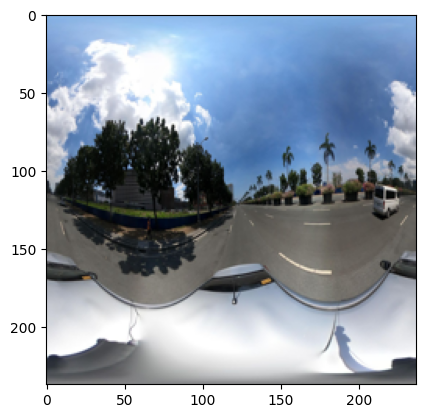

In [195]:
implot = plt.imshow(img1_test[0])

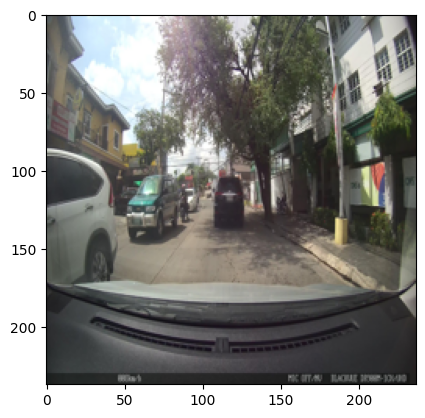

In [196]:
plt.imshow(img2_test[0])